<a href="https://colab.research.google.com/github/silviabarasa/week6-core1P/blob/master/Silvia_Barasa_Week6IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defining the question

## **a) Specifying the Question**



> You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.A prediction result of a game between team 1  and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training). 
You have two possible approaches (polynomial and logistic approaches) given the datasets that will be provided

## **b) Defining the metrics for success**



> The objective for this data includes investigating whether or ot the game is friendly  while making the predictions



## **c) Understanding the context**


> You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below. ---- Predict the result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).



## **d) Recording the Experimental Design**

1. reading in the datasets
2. checking the data for duplicates and missinng data
3. dropping of duplicates and removal filling in of missing data values with zero
4. Finding  and dealing with outliers, anomalies, and missing data within the dataset.
5. Performing of EDA recording of observations.
6. Implementing the solution by performing the respective analysis i.e. factor analysis, principal component analysis, and discriminant analysis.
8. Perform any necessary feature engineering 

9. Check of multicollinearity

10. Start building the model, Cross-validate the model

11. Compute RMSE

12. Create residual plots for your models, and assess their heteroscedasticity using Bartlett’s test

13. Perform appropriate regressions on the data including your justification

14. Challenge your solution by providing insights on how you can make improvements.

# **Checking the data**

In [172]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import datetime as dt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,KFold,StratifiedKFold,cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [53]:
#Load the fifa_ranking.csv file and renaming columns

rank = pd.read_csv('/content/fifa_ranking.csv')
rank.country_full = rank.rename({'country_full': 'country'}, axis = 1, inplace = True)


In [54]:
#Load the first 5 entries of the dataset

rank.head()

,rank,country,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [55]:
#previewing of the dataset

rank.tail()

,rank,country,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [56]:
#Checking the shape of our dataset
rank.shape

(57793, 16)

In [57]:
#Checking the data types of our ranking dataset
rank.dtypes

rank                         int64
country                     object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

#Data Cleaning

> ***Cleaning rank dataset***

In [58]:
#Checking for null values
rank.isnull().sum()

rank                       0
country                    0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

In [59]:
#Perform descriptive analysis on the numerical columns in the dataset

rank.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000
mean,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811
std,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


In [60]:
#Check the datasets for duplicates and thereafter drop the duplicates

rank.duplicated().sum()

37

In [61]:
#Drop the duplicates since the duplicate check returned true
rank.drop_duplicates(keep='first', inplace = True)

In [62]:
#Checking shape of our dataset
rank.shape

(57756, 16)

In [63]:
#Drop certain columns that aren't as relevant in the analysis

rank.drop(columns=['cur_year_avg', 'cur_year_avg_weighted',
       'last_year_avg', 'last_year_avg_weighted', 'two_year_ago_avg',
       'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'country_abrv'], inplace=True)

In [64]:
#Display the fifa_ranking dataset

rank.head()

,rank,country,total_points,previous_points,rank_change,rank_date
0,1,Germany,0.0,57,0,1993-08-08
1,2,Italy,0.0,57,0,1993-08-08
2,3,Switzerland,0.0,50,9,1993-08-08
3,4,Sweden,0.0,55,0,1993-08-08
4,5,Argentina,0.0,51,5,1993-08-08


In [65]:
#Create two new columns for the month and the year, basically split the date column. 
#Since the rank_date is an object data type we have to change it to datetime

rank.rank_date = rank.rank_date.apply(lambda x: x.replace('/', '-'))

rank.rank_date = pd.to_datetime(rank.rank_date)

rank['year'] = rank.rank_date.dt.year

rank['month'] = rank.rank_date.dt.month

In [66]:
#Check the new dataset

rank.head()

,rank,country,total_points,previous_points,rank_change,rank_date,year,month
0,1,Germany,0.0,57,0,1993-08-08,1993,8
1,2,Italy,0.0,57,0,1993-08-08,1993,8
2,3,Switzerland,0.0,50,9,1993-08-08,1993,8
3,4,Sweden,0.0,55,0,1993-08-08,1993,8
4,5,Argentina,0.0,51,5,1993-08-08,1993,8


In [67]:
#Check the unique years in the dataset

rank.year.unique()

array([1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018])

> ***Cleaning the results dataset***

In [68]:
#Load the dataset

result= pd.read_csv('/content/results.csv')
result.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [69]:
#Load the last 5 entries of the dataset
result.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [70]:
#Describing our results dataset
result.describe()

,home_score,away_score
count,40839.000000,40839.000000
mean,1.745709,1.188105
std,1.749145,1.405120
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [71]:
#Check the shape of our dataset
result.shape

(40839, 9)

In [72]:
#Drop the irrelevant columns
result.drop(columns=['city'], inplace=True)

In [73]:
#Split the date column into month and year then add those two columns

result.date = result.date.apply(lambda x: x.replace('/', '-'))

result.date = pd.to_datetime(result.date)

result['year'] = result.date.dt.year

result['month'] = result.date.dt.month

In [74]:
#Since the ranking starts from 1993, we eliminate all the data dated before 1993

res1 = result[result['date']>='1993']

In [75]:
#Validating the years in the results dataset

res1.year.unique()

array([1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019])

> Merging datasets

In [76]:
#Merging the two datasets to obtain the home_team ranking dataset (home_rank)
#results + fifa_ranking = new

new = pd.merge(rank, res1, how = 'inner', left_on = ['year', 'month','country'], right_on = ['year', 'month','home_team'])

In [77]:
#Viewing the final dataset
new.head()

,rank,country_x,total_points,previous_points,rank_change,rank_date,year,month,date,home_team,away_team,home_score,away_score,tournament,country_y,neutral
0,4,Sweden,0.0,55,0,1993-08-08,1993,8,1993-08-11,Sweden,Switzerland,1,2,Friendly,Sweden,False
1,4,Sweden,0.0,55,0,1993-08-08,1993,8,1993-08-22,Sweden,France,1,1,FIFA World Cup qualification,Sweden,False
2,5,Argentina,0.0,51,5,1993-08-08,1993,8,1993-08-22,Argentina,Peru,2,1,FIFA World Cup qualification,Argentina,False
3,5,Argentina,0.0,51,5,1993-08-08,1993,8,1993-08-29,Argentina,Paraguay,0,0,FIFA World Cup qualification,Argentina,False
4,8,Brazil,0.0,55,-5,1993-08-08,1993,8,1993-08-08,Brazil,Mexico,1,1,Friendly,Brazil,False


In [78]:
#Rename certain columns
new.country_x = new.rename({'country_x': 'country'}, axis = 1, inplace = True)

In [79]:
new.rank = new.rename({'rank': 'home_rank'}, axis = 1, inplace = True)

In [80]:
#Rearrange the home_rank dataset

new = new[['home_rank','rank_change','country','home_team','away_team','home_score','away_score','tournament','neutral','month','year','total_points','previous_points']]

new.head()


,home_rank,rank_change,country,home_team,away_team,home_score,away_score,tournament,neutral,month,year,total_points,previous_points
0,4,0,Sweden,Sweden,Switzerland,1,2,Friendly,False,8,1993,0.0,55
1,4,0,Sweden,Sweden,France,1,1,FIFA World Cup qualification,False,8,1993,0.0,55
2,5,5,Argentina,Argentina,Peru,2,1,FIFA World Cup qualification,False,8,1993,0.0,51
3,5,5,Argentina,Argentina,Paraguay,0,0,FIFA World Cup qualification,False,8,1993,0.0,51
4,8,-5,Brazil,Brazil,Mexico,1,1,Friendly,False,8,1993,0.0,55


In [81]:
#Merging the two datasets to obtain the away_team ranking dataset (away_rank)
#results + fifa_ranking = away_rank

new1 = pd.merge(rank, res1, how = 'inner', left_on = ['year', 'month','country'], right_on = ['year', 'month','away_team'])

In [82]:
#previewing top of our dataset
new1.head()

,rank,country_x,total_points,previous_points,rank_change,rank_date,year,month,date,home_team,away_team,home_score,away_score,tournament,country_y,neutral
0,3,Switzerland,0.0,50,9,1993-08-08,1993,8,1993-08-11,Sweden,Switzerland,1,2,Friendly,Sweden,False
1,5,Argentina,0.0,51,5,1993-08-08,1993,8,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,Peru,False
2,5,Argentina,0.0,51,5,1993-08-08,1993,8,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Paraguay,False
3,5,Argentina,0.0,51,5,1993-08-08,1993,8,1993-08-15,Colombia,Argentina,2,1,FIFA World Cup qualification,Colombia,False
4,8,Brazil,0.0,55,-5,1993-08-08,1993,8,1993-08-01,Venezuela,Brazil,1,5,FIFA World Cup qualification,Venezuela,False


In [83]:
#Drop irrelevant columns

new1.drop(columns=['country_y','rank_date','date'], inplace=True)

In [84]:
#Rename certain columns
new1.country_x = new1.rename({'country_x': 'country'}, axis = 1, inplace = True)
new1.rank = new1.rename({'rank': 'away_rank'}, axis = 1, inplace = True)

In [85]:
new1.head()

,away_rank,country,total_points,previous_points,rank_change,year,month,home_team,away_team,home_score,away_score,tournament,neutral
0,3,Switzerland,0.0,50,9,1993,8,Sweden,Switzerland,1,2,Friendly,False
1,5,Argentina,0.0,51,5,1993,8,Peru,Argentina,0,1,FIFA World Cup qualification,False
2,5,Argentina,0.0,51,5,1993,8,Paraguay,Argentina,1,3,FIFA World Cup qualification,False
3,5,Argentina,0.0,51,5,1993,8,Colombia,Argentina,2,1,FIFA World Cup qualification,False
4,8,Brazil,0.0,55,-5,1993,8,Venezuela,Brazil,1,5,FIFA World Cup qualification,False


In [86]:
#Rearrange the away_rank dataset
new1 = new1[['away_rank','away_team','month','year']]
new1.head()


,away_rank,away_team,month,year
0,3,Switzerland,8,1993
1,5,Argentina,8,1993
2,5,Argentina,8,1993
3,5,Argentina,8,1993
4,8,Brazil,8,1993


>final merged

In [87]:
#Merge the home_rank and away_rank datasets using the away_team, month and year
#Why link with the away_team? You want the final dataset to contain home rank and away rank.

final = pd.merge(new, new1, how = 'inner', left_on = ['year', 'month','away_team'], right_on = ['year', 'month','away_team'])

In [88]:
#Checking the top of our dataset
final.head()

,home_rank,rank_change,country,home_team,away_team,home_score,away_score,tournament,neutral,month,year,total_points,previous_points,away_rank
0,4,0,Sweden,Sweden,Switzerland,1,2,Friendly,False,8,1993,0.0,55,3
1,4,0,Sweden,Sweden,France,1,1,FIFA World Cup qualification,False,8,1993,0.0,55,12
2,5,5,Argentina,Argentina,Peru,2,1,FIFA World Cup qualification,False,8,1993,0.0,51,70
3,5,5,Argentina,Argentina,Peru,2,1,FIFA World Cup qualification,False,8,1993,0.0,51,70
4,5,5,Argentina,Argentina,Peru,2,1,FIFA World Cup qualification,False,8,1993,0.0,51,70


> ***Cleaning final dataset***

In [89]:
#Rearrange the home_away dataset

final = final[['home_rank','away_rank','country','home_team','away_team','home_score','away_score','tournament','month','year','total_points','previous_points']]
final.head()

,home_rank,away_rank,country,home_team,away_team,home_score,away_score,tournament,month,year,total_points,previous_points
0,4,3,Sweden,Sweden,Switzerland,1,2,Friendly,8,1993,0.0,55
1,4,12,Sweden,Sweden,France,1,1,FIFA World Cup qualification,8,1993,0.0,55
2,5,70,Argentina,Argentina,Peru,2,1,FIFA World Cup qualification,8,1993,0.0,51
3,5,70,Argentina,Argentina,Peru,2,1,FIFA World Cup qualification,8,1993,0.0,51
4,5,70,Argentina,Argentina,Peru,2,1,FIFA World Cup qualification,8,1993,0.0,51


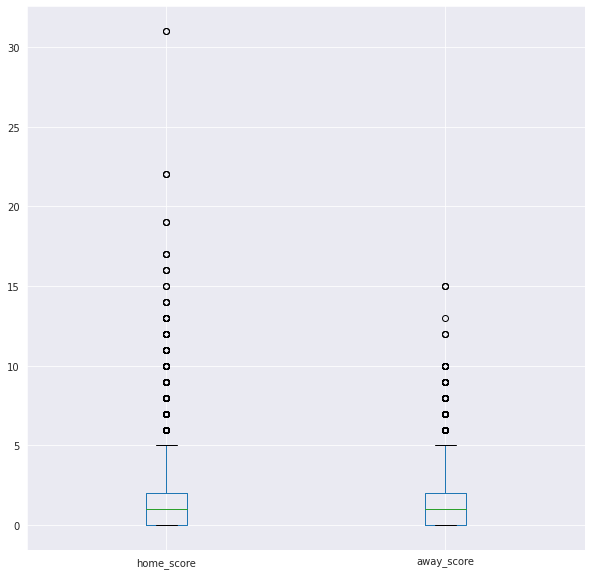

In [90]:
#Checking for outliers
check=['home_score','away_score']

plt.subplots(figsize=(10,10))
final.boxplot(check)

plt.title=('Checking for Outliers in Home and Away scores')
plt.show()

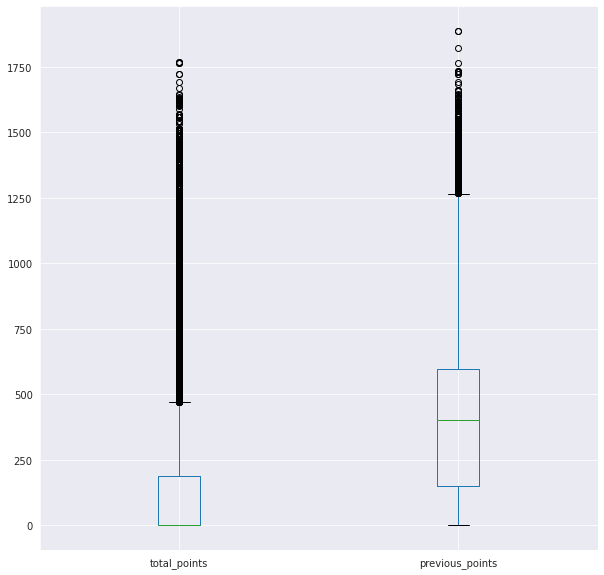

In [91]:
#Checking for Outliers in 'total_points' snd 'previous_points'
check=['total_points','previous_points']

plt.subplots(figsize=(10,10))
final.boxplot(check)

plt.title=('Checking for Outliers in total_points and previous_points')
plt.show()

In [92]:
#Checking for null values
final.isnull().sum()

home_rank          0
away_rank          0
country            0
home_team          0
away_team          0
home_score         0
away_score         0
tournament         0
month              0
year               0
total_points       0
previous_points    0
dtype: int64

In [93]:
#Checking for duplicates
final.duplicated().sum()

11572

#Eploratory Data Analysis

### ***Univariate Analysis***

#### Categorical variables

In [142]:
final1.head(3)

,home_team,away_team,home_score,away_score,tournament_type,home_rank,away_rank,outcome
0,Sweden,Switzerland,1,2,Friendly,4,3,Lose
1,Sweden,France,1,1,Not friendly,4,12,Draw
2,Argentina,Peru,2,1,Not friendly,5,70,Win


***##Frequency Tables***

In [155]:
#Frequency table home team
da = final1.home_team.value_counts()
print("The frequency of home team is: \n", da)
print('\n')
#frequency table of away team
da1 = final1.away_team	.value_counts()
print("The frequency of away team is: \n", da1)
print('\n')
da2 = final1.outcome.value_counts()
print("The frequency of outcome is: \n", da2)
print('\n')
da3 = final1.tournament_type.value_counts()
print("The frequency oftournament type is: \n", da3)
print('\n')

The frequency of home team is: 
 Mexico                      477
Saudi Arabia                459
Oman                        382
Qatar                       381
Japan                       362
                           ... 
Kosovo                       11
Montserrat                   11
Anguilla                     10
Gibraltar                     9
Turks and Caicos Islands      5
Name: home_team, Length: 193, dtype: int64


The frequency of away team is: 
 Saudi Arabia                389
Zambia                      375
Syria                       327
Iraq                        310
Uganda                      307
                           ... 
South Sudan                  19
Turks and Caicos Islands     10
Montserrat                    8
Kosovo                        6
Gibraltar                     6
Name: away_team, Length: 193, dtype: int64


The frequency of outcome is: 
 Win     13512
Lose     8081
Draw     6846
Name: outcome, dtype: int64


The frequency oftournament type is: 


***##Pie Charts***

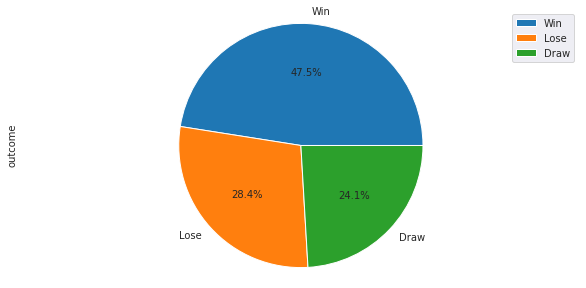

In [156]:
#pie chart for outcome
conf = final1['outcome'].value_counts().plot(kind='pie', autopct = '%1.1f%%')
fig=plt.gcf()
fig.set_size_inches(10,5)
#plt.pie(gender,labels= gender,colors=colors,autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.legend(loc='upper right')
plt.show()

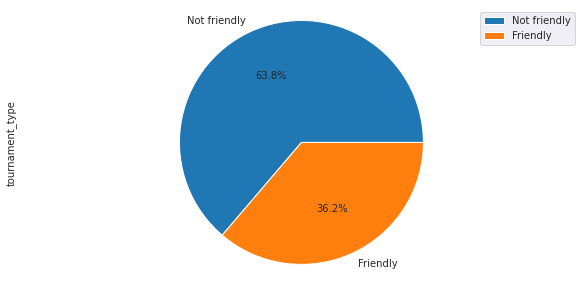

In [157]:
#pie chart for tournament_type
conf = final1['tournament_type'].value_counts().plot(kind='pie', autopct = '%1.1f%%')
fig=plt.gcf()
fig.set_size_inches(10,5)
#plt.pie(gender,labels= gender,colors=colors,autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.legend(loc='upper right')
plt.show()

#### Numerical Variables

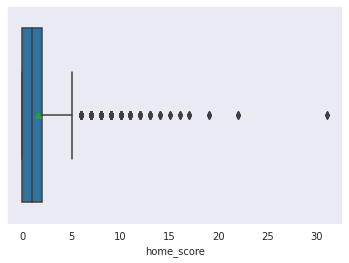

In [158]:
## boxplot
sns.boxplot(final1['home_score'], showmeans=True)

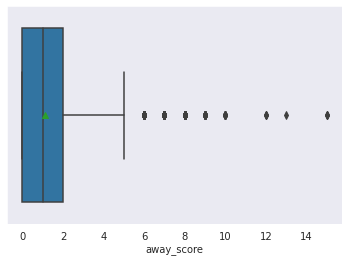

In [159]:
sns.boxplot(final1['away_score'], showmeans=True)

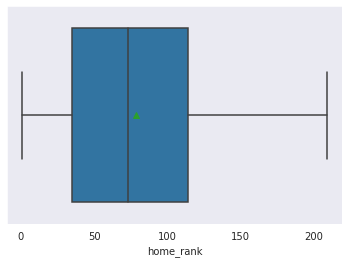

In [160]:
sns.boxplot(final1['home_rank'], showmeans=True)

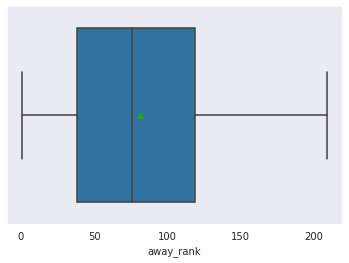

In [161]:
sns.boxplot(final1['away_rank'], showmeans=True)

***##Measures of central tendancy***

In [195]:
final1.head(1)

,home_team,away_team,home_score,away_score,tournament_type,home_rank,away_rank,outcome
0,Sweden,Switzerland,1,2,Friendly,4,3,Lose


In [198]:
#mean for home score, away score, home rank, away rank

d1 = final1['home_score'].mean()
print("The mean for home score is: \n", d1)
print('\n')
d2 = final1['away_score'].mean()
print("The mean for away score is: \n", d2)
print('\n')
d3 = final1['home_rank'].mean()
print("The mean for home rank is: \n", d3)
print('\n')
d4 = final1['away_rank'].mean()
print("The mean for away rank is: \n", d4)
print('\n')

The mean for home score is: 
 1.5968212665705546


The mean for away score is: 
 1.1014451984950244


The mean for home rank is: 
 78.38781251098843


The mean for away rank is: 
 81.40919160308027




In [200]:
#mode for home score, away score, home rank, away rank

d1 = final1['home_score'].mode()
print("The mode for home score is: \n", d1)
print('\n')
d2 = final1['home_score'].mode()
print("The mode for away score is: \n", d2)
print('\n')
d3 = final1['home_rank'].mode()
print("The mode for home rank is: \n", d3)
print('\n')
d4 = final1['away_rank'].mode()
print("The mode for away rank is: \n", d4)
print('\n')

The mode for home score is: 
 0    1
dtype: int64


The mode for away score is: 
 0    1
dtype: int64


The mode for home rank is: 
 0    1
dtype: int64


The mode for away rank is: 
 0    40
dtype: int64




In [201]:
#median for numeric variables
d1 = final1.median()
d1

home_score     1.0
away_score     1.0
home_rank     73.0
away_rank     76.0
dtype: float64

***##Measures of dispersion***

In [202]:
#Standard deviation for numeric variables
d1 = final1.std().sort_values(ascending=False)
d1

away_rank     52.575171
home_rank     51.097232
home_score     1.635258
away_score     1.279389
dtype: float64

In [204]:
#Variance for numeric variables
d1 = final1.var().sort_values(ascending=False)
d1

away_rank     2764.148577
home_rank     2610.927133
home_score       2.674068
away_score       1.636836
dtype: float64

In [206]:
#Range
max = final1['home_rank'].max()
min = final1['home_rank'].min()
range = max - min
print('Range for home rank is:', range)
max1 = final1['away_rank'].max()
min1 = final1['away_rank'].min()
range3 = max1 - min1
print('Range for away rank is:', range3)
max = final1['home_score'].max()
min = final1['home_score'].min()
range1 = max - min
print('Range for home score is:', range1)
max = final1['away_score'].max()
min = final1['away_score'].min()
range1 = max - min
print('Range for away score is:', range1)

Range for home rank is: 208
Range for away rank is: 208
Range for home score is: 31
Range for away score is: 15


***##Quantiles***

In [208]:
#The quantiles
d = final1['home_rank'].quantile([0.25,0.5,0.75])
print('The quantiles for home rank is \n', d)
print('\n')
d3 = final1['away_rank'].quantile([0.25,0.5,0.75])
print('The quantiles for away rank is \n', d3)
print('\n')
d1 = final1['home_score'].quantile([0.25,0.5,0.75])
print('The quantiles for home score is \n', d1)
print('\n')
d2 = final1['away_score'].quantile([0.25,0.5,0.75])
print('The quantiles for away score is \n', d2)
print('\n')

The quantiles for home rank is 
 0.25     35.0
0.50     73.0
0.75    114.0
Name: home_rank, dtype: float64


The quantiles for away rank is 
 0.25     38.0
0.50     76.0
0.75    119.0
Name: away_rank, dtype: float64


The quantiles for home score is 
 0.25    0.0
0.50    1.0
0.75    2.0
Name: home_score, dtype: float64


The quantiles for away score is 
 0.25    0.0
0.50    1.0
0.75    2.0
Name: away_score, dtype: float64




***##Skeweness***

In [210]:
#Skeweness
_df = final1['home_rank'].skew()
print('Skewness for home rank is:',_df)
if _df > 0:
  print('The distribution is positively skewed')
elif _df < 0:
    print('The distribution is negatively skewed')
else:
    print(' The distribution is Symmetric')
print('\n')
_df1 = final1['away_rank'].skew()
print('Skewness for away rank is:',_df1)
if _df1 > 0:
  print('The distribution is positively skewed')
elif _df1 < 0:
    print('The distribution is negatively skewed')
else:
    print(' The distribution is Symmetric')
print('\n')
home_df = final1['home_score'].skew()
print('Skewness for home score is:', home_df)
if home_df > 0:
  print('The distribution is positively skewed')
elif home_df < 0:
    print('The distribution is negatively skewed')
else:
    print(' The distribution is Symmetric')
print('\n')
away_df = final1['away_score'].skew()
print('Skewness for away score is:', away_df)
if away_df > 0:
  print('The distribution is positively skewed')
elif away_df < 0:
    print('The distribution is negatively skewed')
else:
    print(' The distribution is Symmetric')


Skewness for home rank is: 0.40098469816699667
The distribution is positively skewed


Skewness for away rank is: 0.39821406908363416
The distribution is positively skewed


Skewness for home score is: 2.5422332443084934
The distribution is positively skewed


Skewness for away score is: 1.9630314361858547
The distribution is positively skewed


***##Kurtosis***

In [211]:
#Kurtosis
_df = final1['home_rank'].kurt()
print('Kurtosis for home rank is:',_df)
if _df > 0:
  print('Leptokurtic')
elif _df < 0:
    print('Platykurtic')
else:
    print('Mesokurtic')
print('\n')
_df1 = final1['away_rank'].kurt()
print('Kurtosis for away rank is:',_df1)
if _df > 0:
  print('Leptokurtic')
elif _df < 0:
    print('Platykurtic')
else:
    print('Mesokurtic')
print('\n')
home_df = final1['home_score'].kurt()
print('Kurtosis for home score is:',home_df)
if home_df > 0:
  print('Leptokurtic')
elif home_df < 0:
    print('Platykurtic')
else:
    print('Mesokurtic')
print('\n')
away_df = final['away_score'].kurt()
print('Kurtosis for away score is:',away_df)
if away_df > 0:
  print('Leptokurtic')
elif away_df < 0:
    print('Platykurtic')
else:
    print('Mesokurtic')


Kurtosis for home rank is: -0.7337244781639729
Platykurtic


Kurtosis for away rank is: -0.7729507575409951
Platykurtic


Kurtosis for home score is: 17.961500738676342
Leptokurtic


Kurtosis for away score is: 7.128363535669099
Leptokurtic


In [212]:
#summary statistics
final1.describe().astype(str)

,home_score,away_score,home_rank,away_rank
count,28439.0,28439.0,28439.0,28439.0
mean,1.5968212665705546,1.1014451984950244,78.38781251098843,81.40919160308027
std,1.6352578515860152,1.2793887576896588,51.09723214877615,52.57517072878953
min,0.0,0.0,1.0,1.0
25%,0.0,0.0,35.0,38.0
50%,1.0,1.0,73.0,76.0
75%,2.0,2.0,114.0,119.0
max,31.0,15.0,209.0,209.0


## *Bivariate Analysis*

### Numerical and Numerical

In [162]:
final1.head()

,home_team,away_team,home_score,away_score,tournament_type,home_rank,away_rank,outcome
0,Sweden,Switzerland,1,2,Friendly,4,3,Lose
1,Sweden,France,1,1,Not friendly,4,12,Draw
2,Argentina,Peru,2,1,Not friendly,5,70,Win
3,Argentina,Peru,2,1,Not friendly,5,70,Win
4,Argentina,Peru,2,1,Not friendly,5,70,Win


In [169]:
#Grouping our away rank to away score
scatter=final1.groupby('away_rank')['away_score'].sum().reset_index(name='away score')
scatter

,away_rank,away score
0,1,567
1,2,389
2,3,399
3,4,401
4,5,386
...,...,...
204,205,2
205,206,18
206,207,15
207,208,0


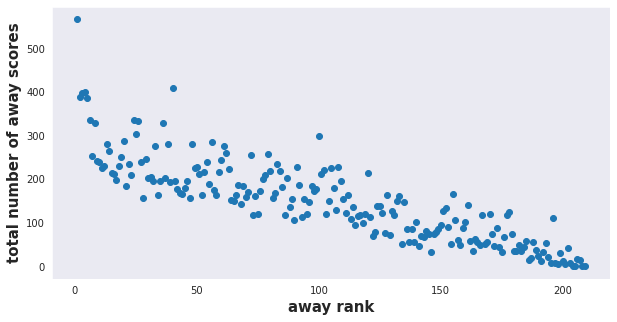

In [174]:

# Plotting our scatterplot
plt.figure(figsize=(10,5))
plt.scatter(scatter["away_rank"] , scatter["away score"])
# Giving our scatter plot a title
#plt.title('away rank vs away score', fontweight='bold', fontsize=18)

# Labelling our x axis
plt.xlabel('away rank', fontweight='bold', fontsize=15)

# Labelling our y axis
plt.ylabel('total number of away scores', fontweight='bold', fontsize=15)

# Displaying our scatterplot
plt.show()
#there is a negative relation since as rank increases the total away scores size decreases 

In [175]:
#Grouping our home rank to home score
scatter=final1.groupby('home_rank')['home_score'].sum().reset_index(name='home score')
scatter

,home_rank,home score
0,1,700
1,2,481
2,3,475
3,4,466
4,5,525
...,...,...
204,205,7
205,206,12
206,207,7
207,208,0


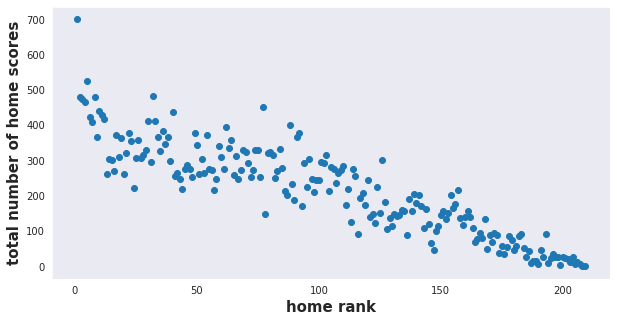

In [176]:
# Plotting our scatterplot
plt.figure(figsize=(10,5))
plt.scatter(scatter["home_rank"] , scatter["home score"])
# Giving our scatter plot a title
#plt.title('home rank vs home score', fontweight='bold', fontsize=18)

# Labelling our x axis
plt.xlabel('home rank', fontweight='bold', fontsize=15)

# Labelling our y axis
plt.ylabel('total number of home scores', fontweight='bold', fontsize=15)

# Displaying our scatterplot
plt.show()
#there is a negative relation since as rank increases the total away scores size decreases 

### Categorical and Numerical

***##Correlation***

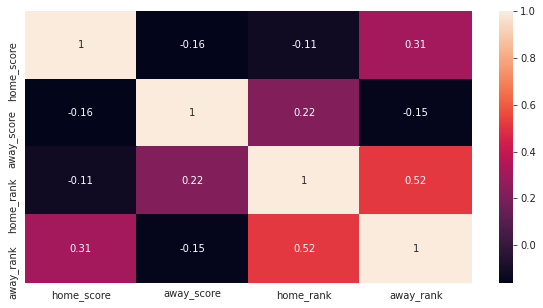

In [177]:
#  showing correlation on a heatmap
plt.figure(figsize=(10,5))
sns.heatmap(final1.corr(),annot=True)
plt.show()

***##Line Graphs***

In [181]:
line = final.groupby('year')['home_score'].sum().reset_index(name='home_score_sum')
line

,year,home_score_sum
0,1993,415
1,1994,963
2,1995,1204
3,1996,1680
4,1997,1889
5,1998,1405
6,1999,1741
7,2000,2718
8,2001,3028
9,2002,1459


Text(0, 0.5, 'sum home score')

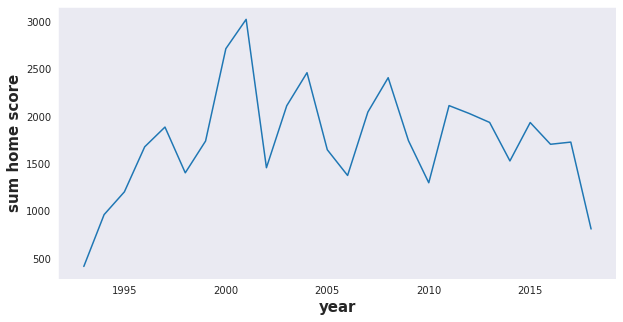

In [191]:
# Line graph for year and home score
plt.figure(figsize=(10,5))
plt.plot(line['year'], line['home_score_sum'])
plt.xlabel('year', fontweight='bold', fontsize=15)
plt.ylabel('sum home score', fontweight='bold', fontsize=15)

In [183]:
line1 = final.groupby('year')['away_score'].sum().reset_index(name='away_score_sum')
line1

,year,away_score_sum
0,1993,225
1,1994,761
2,1995,754
3,1996,1163
4,1997,1168
5,1998,966
6,1999,1182
7,2000,1618
8,2001,1777
9,2002,1060


Text(0, 0.5, 'sum away score')

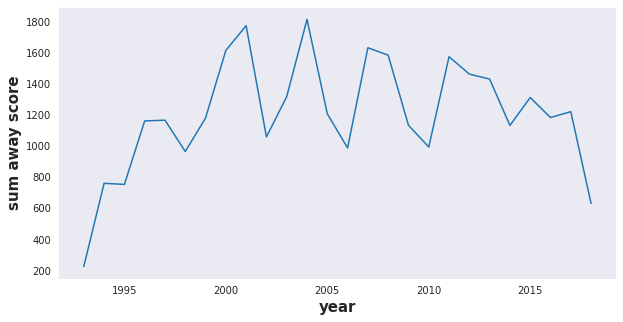

In [190]:
# Line graph for year and away score
plt.figure(figsize=(10,5))
plt.plot(line1['year'], line1['away_score_sum'])
plt.xlabel('year', fontweight='bold', fontsize=15)
plt.ylabel('sum away score', fontweight='bold', fontsize=15)

***##Z test***

In [192]:
#Z Score for rank
from scipy import stats
data1 = final['home_score']
from scipy.stats import zscore
stats.zscore(data1)

array([-0.36497716, -0.36497716,  0.24655795, ...,  2.69269837,
       -0.97651226, -0.97651226])

In [193]:
#Z Score for rank
from scipy import stats
data1 = final['away_score']
from scipy.stats import zscore
stats.zscore(data1)

array([ 0.70234367, -0.07929332, -0.07929332, ..., -0.86093031,
       -0.86093031, -0.86093031])

##Feature Engineering

In [94]:
#Create a new column in the home_away dataset. This shows the goal difference between the home and away score.

final['goal_difference'] = final['home_score'] - final['away_score']

final.head()

,home_rank,away_rank,country,home_team,away_team,home_score,away_score,tournament,month,year,total_points,previous_points,goal_difference
0,4,3,Sweden,Sweden,Switzerland,1,2,Friendly,8,1993,0.0,55,-1
1,4,12,Sweden,Sweden,France,1,1,FIFA World Cup qualification,8,1993,0.0,55,0
2,5,70,Argentina,Argentina,Peru,2,1,FIFA World Cup qualification,8,1993,0.0,51,1
3,5,70,Argentina,Argentina,Peru,2,1,FIFA World Cup qualification,8,1993,0.0,51,1
4,5,70,Argentina,Argentina,Peru,2,1,FIFA World Cup qualification,8,1993,0.0,51,1


In [95]:
final.head()

,home_rank,away_rank,country,home_team,away_team,home_score,away_score,tournament,month,year,total_points,previous_points,goal_difference
0,4,3,Sweden,Sweden,Switzerland,1,2,Friendly,8,1993,0.0,55,-1
1,4,12,Sweden,Sweden,France,1,1,FIFA World Cup qualification,8,1993,0.0,55,0
2,5,70,Argentina,Argentina,Peru,2,1,FIFA World Cup qualification,8,1993,0.0,51,1
3,5,70,Argentina,Argentina,Peru,2,1,FIFA World Cup qualification,8,1993,0.0,51,1
4,5,70,Argentina,Argentina,Peru,2,1,FIFA World Cup qualification,8,1993,0.0,51,1


In [97]:
#We have to specify the tournament type in three categories : 
def tournament (t):
 if t == "Friendly":
  return "Friendly"
 else:
    return "Not friendly"
final["tournament_type"] = final.tournament.apply(lambda x: tournament(x))

In [98]:
conditions = [
    (final['home_score'] > final['away_score']),
    (final['home_score'] < final['away_score']),
    (final['home_score'] == final['away_score'])
    ]

# create a list of the values we want to assign for each condition
values = ['Win', 'Lose', 'Draw']

# create a new column and use np.select to assign values to it using our lists as arguments
final['outcome'] = np.select(conditions, values)

In [99]:
#Drop the tournament column and leave the tournament_type column
final.drop(columns=['tournament'], inplace=True)

# Checking for multi-collinearity

In [100]:
#Are the independent variables correlated? We get the Pearson's correlation to find out. A heatmap can also give better visualization.
corr = final.corr()
corr

,home_rank,away_rank,home_score,away_score,month,year,total_points,previous_points,goal_difference
home_rank,1.000000,0.515308,-0.114510,0.221365,0.067434,0.091889,-0.299439,-0.652942,-0.210721
away_rank,0.515308,1.000000,0.307728,-0.151487,0.068120,0.091281,-0.147924,-0.310923,0.312198
home_score,-0.114510,0.307728,1.000000,-0.161033,0.020218,-0.052214,0.012154,0.069234,0.824708
away_score,0.221365,-0.151487,-0.161033,1.000000,0.019419,-0.012372,-0.061949,-0.130760,-0.690983
month,0.067434,0.068120,0.020218,0.019419,1.000000,-0.008268,0.011014,-0.068743,0.003681
year,0.091889,0.091281,-0.052214,-0.012372,-0.008268,1.000000,0.624147,0.408979,-0.031154
total_points,-0.299439,-0.147924,0.012154,-0.061949,0.011014,0.624147,1.000000,0.546987,0.044401
previous_points,-0.652942,-0.310923,0.069234,-0.130760,-0.068743,0.408979,0.546987,1.000000,0.125640
goal_difference,-0.210721,0.312198,0.824708,-0.690983,0.003681,-0.031154,0.044401,0.125640,1.000000


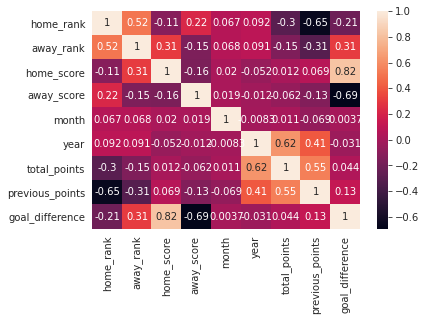

In [101]:
#Display a heatmap
sns.heatmap(final.corr(),annot=True)

> Using the VIF to check for multi-collinearity.

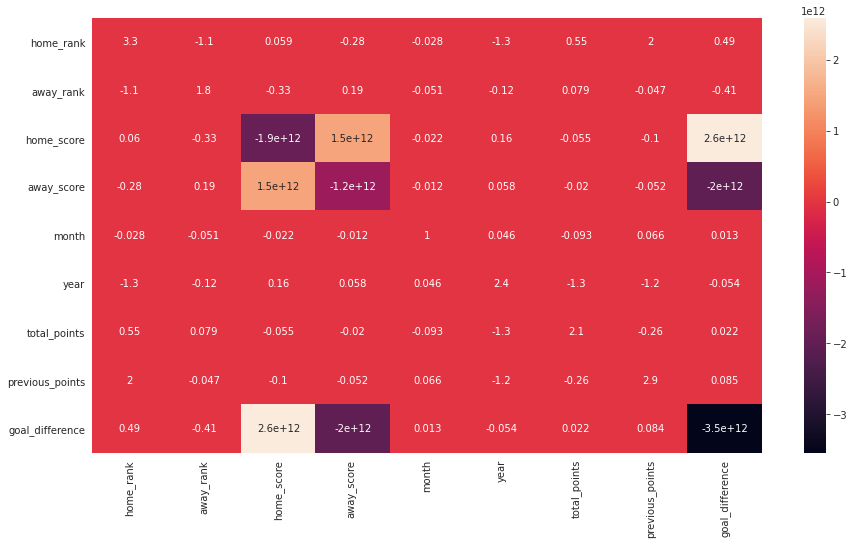

In [102]:
vif_df = pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns = corr.columns)

#Plot a heatmap

sns.set_style('dark')
plt.subplots(figsize =  (15,8))
sns.heatmap(vif_df, annot = True)


plt.show()

###Approach 1 : Polynomial Regression

In [103]:
final1 = final[['home_team','away_team','home_score','away_score','tournament_type','home_rank','away_rank','outcome']]
final1.head()


,home_team,away_team,home_score,away_score,tournament_type,home_rank,away_rank,outcome
0,Sweden,Switzerland,1,2,Friendly,4,3,Lose
1,Sweden,France,1,1,Not friendly,4,12,Draw
2,Argentina,Peru,2,1,Not friendly,5,70,Win
3,Argentina,Peru,2,1,Not friendly,5,70,Win
4,Argentina,Peru,2,1,Not friendly,5,70,Win


In [104]:
#Exporting our clean dataset
final1.to_csv('silvia.csv')

In [139]:
analysis=pd.read_csv('/content/silvia.csv')

In [140]:
#Drop the Unnamed: 0 column
analysis.drop(columns=['Unnamed: 0'], inplace=True)

> ###Model 1 : Predicting the home score using Polynomial Regression

In [107]:
analysis.head(1)

,home_team,away_team,home_score,away_score,tournament_type,home_rank,away_rank,outcome
0,Sweden,Switzerland,1,2,Friendly,4,3,Lose


In [108]:
# Creating the X and y variables

X = analysis[['home_team','away_team','away_score','tournament_type','home_rank','away_rank','outcome']]
y = analysis.home_score
print(X)
print(y)


       home_team    away_team  away_score  ... home_rank  away_rank  outcome
0         Sweden  Switzerland           2  ...         4          3     Lose
1         Sweden       France           1  ...         4         12     Draw
2      Argentina         Peru           1  ...         5         70      Win
3      Argentina         Peru           1  ...         5         70      Win
4      Argentina         Peru           1  ...         5         70      Win
...          ...          ...         ...  ...       ...        ...      ...
28434     Latvia      Estonia           0  ...       129         94      Win
28435     Angola       Malawi           0  ...       137        123     Draw
28436   Botswana    Mauritius           0  ...       139        155      Win
28437    Lesotho     Zimbabwe           0  ...       147        118     Draw
28438   Barbados       Belize           0  ...       160        163     Draw

[28439 rows x 7 columns]
0        1
1        1
2        2
3        2
4     

In [109]:
#Encoding categorical variables

X = pd.get_dummies(X, drop_first=True)

In [110]:
#Splitting the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

However, if a fixed value is assigned like random_state = 42 then no matter how many times you execute your code the result would be the same .i.e, same values in train and test datasets.

In [111]:
#Standardising the X_train and the X_test to the same scale

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [112]:
#Fitting the polynomial features to the X_train and X_test

poly_features = PolynomialFeatures(degree = 1)
X_train = poly_features.fit_transform(X_train)
X_test = poly_features.fit_transform(X_test)

In [113]:
# Training the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [114]:
# Making predictions
y_pred = regressor.predict(X_test)

In [115]:
# Measuring the accuracy of the model

print("The RMSE score for the model : ", np.sqrt(mean_squared_error(y_test, y_pred)))

The RMSE score for the model :  1.1197036484105702


The RMSE score is quite high, since a fifth mean is significantly lower than 1.1197

> **Bartlett's test**

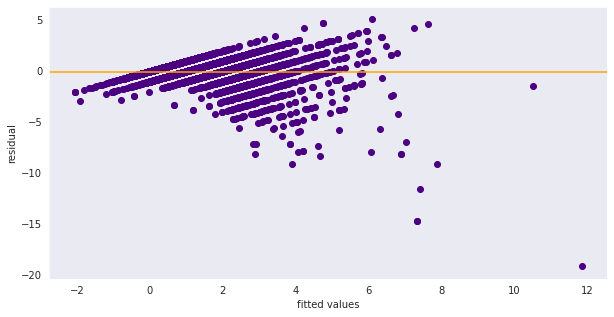

In [116]:
residuals = y_pred - y_test

# Plotting the prediction errors
plt.figure(figsize=(10,5))
plt.scatter(y_pred, residuals, color='indigo')
#plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='orange')
plt.show()

###Model 2 : Predicting the Away score using Polynomial Regression 

In [117]:
# Creating the X and y variables
X1 = analysis[['home_team','away_team','home_score','tournament_type','home_rank','away_rank','outcome']]
y1 = analysis.away_score
print(X1)
print(y1)

       home_team    away_team  home_score  ... home_rank  away_rank  outcome
0         Sweden  Switzerland           1  ...         4          3     Lose
1         Sweden       France           1  ...         4         12     Draw
2      Argentina         Peru           2  ...         5         70      Win
3      Argentina         Peru           2  ...         5         70      Win
4      Argentina         Peru           2  ...         5         70      Win
...          ...          ...         ...  ...       ...        ...      ...
28434     Latvia      Estonia           1  ...       129         94      Win
28435     Angola       Malawi           0  ...       137        123     Draw
28436   Botswana    Mauritius           6  ...       139        155      Win
28437    Lesotho     Zimbabwe           0  ...       147        118     Draw
28438   Barbados       Belize           0  ...       160        163     Draw

[28439 rows x 7 columns]
0        2
1        1
2        1
3        1
4     

In [118]:
#Encoding categorical variables

X1 = pd.get_dummies(X1, drop_first=True)
X1

,home_score,home_rank,away_rank,home_team_Albania,home_team_Algeria,home_team_American Samoa,home_team_Andorra,home_team_Angola,home_team_Anguilla,home_team_Antigua and Barbuda,home_team_Argentina,home_team_Armenia,home_team_Aruba,home_team_Australia,home_team_Austria,home_team_Azerbaijan,home_team_Bahamas,home_team_Bahrain,home_team_Bangladesh,home_team_Barbados,home_team_Belarus,home_team_Belgium,home_team_Belize,home_team_Benin,home_team_Bermuda,home_team_Bhutan,home_team_Bolivia,home_team_Bosnia and Herzegovina,home_team_Botswana,home_team_Brazil,home_team_British Virgin Islands,home_team_Bulgaria,home_team_Burkina Faso,home_team_Burundi,home_team_Cambodia,home_team_Cameroon,home_team_Canada,home_team_Cayman Islands,home_team_Central African Republic,home_team_Chad,...,away_team_Singapore,away_team_Slovakia,away_team_Slovenia,away_team_Solomon Islands,away_team_Somalia,away_team_South Africa,away_team_South Sudan,away_team_Spain,away_team_Sri Lanka,away_team_Sudan,away_team_Suriname,away_team_Sweden,away_team_Switzerland,away_team_Syria,away_team_Tahiti,away_team_Tajikistan,away_team_Tanzania,away_team_Thailand,away_team_Togo,away_team_Tonga,away_team_Trinidad and Tobago,away_team_Tunisia,away_team_Turkey,away_team_Turkmenistan,away_team_Turks and Caicos Islands,away_team_Uganda,away_team_Ukraine,away_team_United Arab Emirates,away_team_Uruguay,away_team_Uzbekistan,away_team_Vanuatu,away_team_Venezuela,away_team_Vietnam,away_team_Wales,away_team_Yemen,away_team_Zambia,away_team_Zimbabwe,tournament_type_Not friendly,outcome_Lose,outcome_Win
0,1,4,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,4,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2,5,70,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,2,5,70,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
4,2,5,70,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28434,1,129,94,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
28435,0,137,123,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
28436,6,139,155,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
28437,0,147,118,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [119]:
#Splitting the dataset into training and testing sets

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.3, random_state = 42)

In [120]:
#Standardising the X_train and the X_test to the same scale

sc = StandardScaler()
X_train1 = sc.fit_transform(X_train1)
X_test1 = sc.transform(X_test1)

In [121]:
#Fitting the polynomial features to the X_train and X_test

poly_features = PolynomialFeatures(degree = 1)
X_train1 = poly_features.fit_transform(X_train1)
X_test1 = poly_features.fit_transform(X_test1)

In [122]:
# Training the model
regressor = LinearRegression()
regressor.fit(X_train1, y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [123]:
# Making predictions
y_pred1 = regressor.predict(X_test1)

In [124]:
# Measuring the accuracy of the model

print("The RMSE score for the model : ", np.sqrt(mean_squared_error(y_test1, y_pred1)))

The RMSE score for the model :  0.8583691915474696


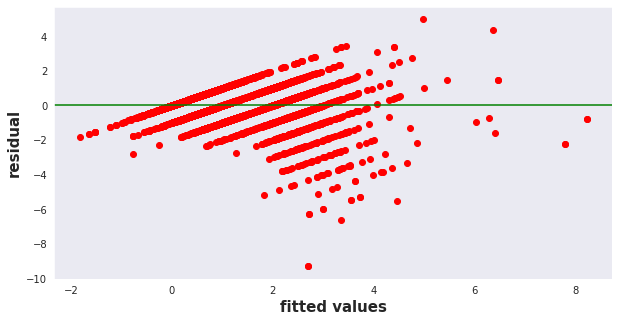

In [125]:
residuals = y_pred1 - y_test1

# Plotting the prediction errors
plt.figure(figsize=(10,5))
plt.scatter(y_pred1, residuals, color='red')
#plt.title('Residual Plot')
plt.ylabel('residual', fontweight='bold',fontsize=15)
plt.xlabel('fitted values',fontweight='bold',fontsize=15)
plt.axhline(y= residuals.mean(), color='green')
plt.show()

##Approach 2 : Logistic Regression

In [134]:
# Creating the X and y variables
X = analysis[['home_team','away_team','home_score','tournament_type','home_rank','away_rank']]
y = analysis.outcome
print(X)
print(y)

       home_team    away_team  home_score tournament_type  home_rank  away_rank
0         Sweden  Switzerland           1        Friendly          4          3
1         Sweden       France           1    Not friendly          4         12
2      Argentina         Peru           2    Not friendly          5         70
3      Argentina         Peru           2    Not friendly          5         70
4      Argentina         Peru           2    Not friendly          5         70
...          ...          ...         ...             ...        ...        ...
28434     Latvia      Estonia           1    Not friendly        129         94
28435     Angola       Malawi           0    Not friendly        137        123
28436   Botswana    Mauritius           6    Not friendly        139        155
28437    Lesotho     Zimbabwe           0    Not friendly        147        118
28438   Barbados       Belize           0        Friendly        160        163

[28439 rows x 6 columns]
0        Lose


In [136]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=42)

In [137]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

# Making predictions
y_pred = logistic.predict(X_test)

# Measuring the accuracy of the model
print("The accuracy of the model is", {accuracy_score(y_test, y_pred)})
print("The f1 score of the model is", {f1_score(y_test, y_pred, average = "macro")})


The accuracy of the model is {0.5656352555086732}
The f1 score of the model is {0.49185699649683023}


Logistic Regression could predict with 56% accuracy whether a team would win, draw or loose at home based on the tounament, if the ground was neutral and home team and away team FIFA ranking.

Overall the accuracy is generally low. To increase the accuracy of the model an increase in data points can improve accuracy in prediction significantly.

##Challenging the Solution

Attempt to make the predictions using other models to find out which one has the highest accuracy.

